In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
# Columns are: dp_degree / hp_degree / pp_degree / num_microbatches / throughput
data = pd.read_csv("../grid_search_results.csv", names=['D', 'H', 'P', 'num_microbatches', 'throughput'], header=0)

In [9]:
data

,D,H,P,num_microbatches,throughput
0,1,1,1,1,3725.917956
1,1,1,2,2,3985.797184
2,1,1,2,4,4542.716324
3,1,1,2,8,4820.721009
4,1,1,2,16,4843.572497
...,...,...,...,...,...
106,8,1,2,4,28950.375124
107,8,1,2,8,27710.987580
108,8,1,2,16,23681.009882
109,8,2,1,1,55154.658487


In [10]:
plt_data = data[data['P'] == 1]
plt_data

,D,H,P,num_microbatches,throughput
0,1,1,1,1,3725.917956
6,1,2,1,1,7189.391772
7,2,1,1,1,7480.758102
18,1,4,1,1,13432.623850
24,2,2,1,1,14719.775420
25,4,1,1,1,14487.991685
41,1,8,1,1,23740.835708
52,2,4,1,1,28385.364185
57,4,2,1,1,28791.480862
58,8,1,1,1,27251.020953


<IPython.core.display.Javascript object>


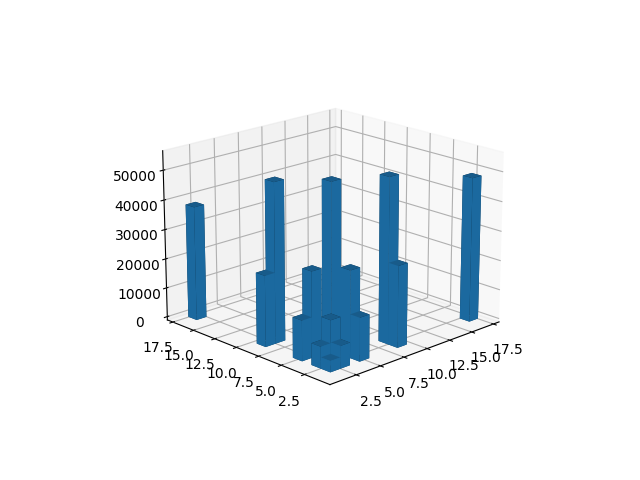

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
n = len(plt_data)
ax1.bar3d(plt_data['D'], plt_data['H'], np.zeros(n), np.ones(n), np.ones(n), plt_data['throughput'])

In [12]:
data = data.sort_values('throughput')
data

,D,H,P,num_microbatches,throughput
0,1,1,1,1,3725.917956
1,1,1,2,2,3985.797184
2,1,1,2,4,4542.716324
5,1,1,2,32,4614.520035
3,1,1,2,8,4820.721009
...,...,...,...,...,...
79,1,16,1,1,38521.595169
110,16,1,1,1,48703.347025
95,2,8,1,1,53323.820781
109,8,2,1,1,55154.658487


In [15]:
pp_data = data[(data['D'] == 1) & (data['H'] == 1)]
pp_data

,D,H,P,num_microbatches,throughput
0,1,1,1,1,3725.917956
1,1,1,2,2,3985.797184
2,1,1,2,4,4542.716324
5,1,1,2,32,4614.520035
3,1,1,2,8,4820.721009
4,1,1,2,16,4843.572497
8,1,1,4,2,5365.482003
26,1,1,8,2,6044.344574
59,1,1,16,2,6421.994152
9,1,1,4,4,6466.998742


<IPython.core.display.Javascript object>


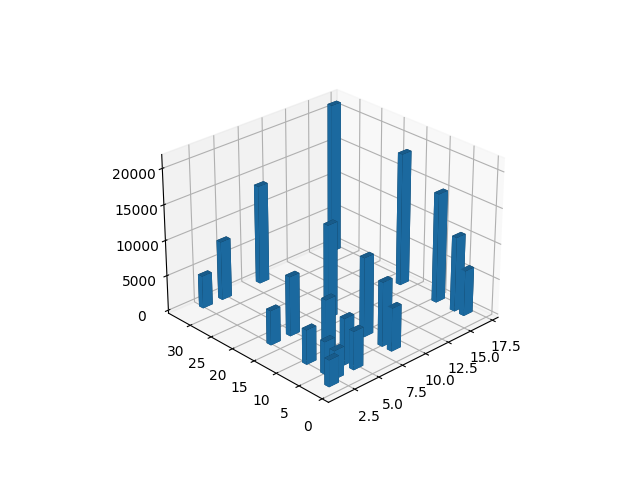

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
n = len(pp_data)
ax1.bar3d(pp_data['P'], pp_data['num_microbatches'], np.zeros(n), np.ones(n), np.ones(n), pp_data['throughput'])

<IPython.core.display.Javascript object>


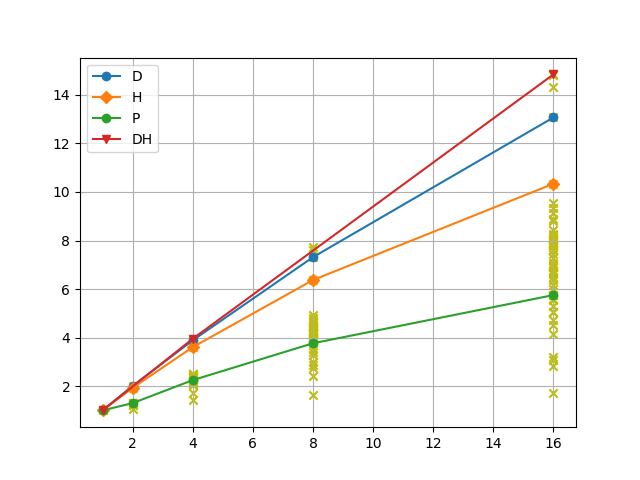

In [48]:
data['speedup'] = data['throughput']/3725.917956
only_D = [r['speedup'] for i, r in data.iterrows() if r['H'] == 1 and r['P'] == 1]
only_H = [r['speedup'] for i, r in data.iterrows() if r['D'] == 1 and r['P'] == 1]
half_DH = [r['speedup'] for i, r in data.iterrows() if r['D'] == r['H'] and r['P'] == 1]
half_DH_devs = [r['D']*r['H']*r['P'] for i, r in data.iterrows() if r['D'] == r['H'] and r['P'] == 1]
# For each P degree, find the num_microbatches with best throughput (note it's not always 32!)
pp_data = data[(data['D'] == 1) & (data['H'] == 1)]
best_P = pp_data.loc[pp_data.groupby('P')['throughput'].idxmax()]

devices = [2**i for i in range(5)]
plt.plot(devices, only_D, marker='o', label='D')
plt.plot(devices, only_H, marker='D', label='H')
plt.plot(best_P['P'], best_P['speedup'], marker='o', label='P')
plt.plot(half_DH_devs, half_DH, marker='v', label='DH')
plt.scatter(data['D']*data['H']*data['P'], data['speedup'], marker='x', color='y')
plt.grid(True)
plt.legend()
# Try up to 32 for DH

In [29]:
pp_h_data = data[(data['D'] == 1)]